<a href="https://colab.research.google.com/github/unabletoproceed/Tugas-Besar-Pemrograman-Python/blob/main/ceritanya_alpukat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Oleh Kelompok B:
* MUHAMMAD AGUS ATHARIQ (1101220267)
* RAIHAN RAMADHAN SETIAWAN (1101223012)
* HUSNA FIRYAL AZ-ZAHRA (1101223038)
* JOSEPHINE MONICA (1101223063)



**Context**
It is a well known fact that Millenials LOVE Avocado Toast. It's also a well known fact that all Millenials live in their parents basements.

Clearly, they aren't buying home because they are buying too much Avocado Toast!

But maybe there's hope… if a Millenial could find a city with cheap avocados, they could live out the Millenial American Dream.

**Content**
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website:

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

* Date - The date of the observation
*   AveragePrice - the average price of a single avocado
*   type - conventional or organic
*   year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

####Import Library & Dataset

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import plotly.offline as py
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools

import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")

Proses Import menggunakan url

In [136]:
url = 'https://raw.githubusercontent.com/hananlu/basicPython/master/Dataset/avocadoPrice.csv'
df = pd.read_csv(url)

###Overview Dataset

In [137]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [143]:
df.sample(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2198,14,2015-09-20,1.56,578500.76,94105.15,380999.77,33739.89,69655.95,68664.57,946.67,44.71,conventional,2015,SanFrancisco
602,30,2015-05-31,0.68,1377670.81,941838.33,315653.39,7287.06,112892.03,99456.40,13421.47,14.16,conventional,2015,DallasFtWorth
4970,30,2016-05-29,0.92,576543.05,183028.56,168419.71,32042.58,193052.20,160356.37,31715.55,980.28,conventional,2016,SanDiego


###Check Jumlah baris dan kolom pada dataset

In [100]:
# Menampilkan bentuk dari data: (Baris, Kolom)
df.shape

(18249, 14)

In [101]:
print(f"Jumlah Baris {df.shape[0]}")
print(f"Jumlah Kolom {df.shape[1]}")

Jumlah Baris 18249
Jumlah Kolom 14


###Check tipe data setiap kolom

In [102]:
df.describe

<bound method NDFrame.describe of        Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [104]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

###Check missing value pada setiap kolom

In [ ]:
df.isnull().sum()

type            0
Total Volume    0
dtype: int64

###Check duplicated value

In [ ]:
df.duplicated().sum()

0

###Jumlah tiap kategori

In [145]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [146]:
df[['region', 'type']].value_counts()

region              type        
Albany              conventional    169
Pittsburgh          conventional    169
Roanoke             organic         169
                    conventional    169
RichmondNorfolk     organic         169
                                   ... 
HarrisburgScranton  conventional    169
GreatLakes          organic         169
                    conventional    169
GrandRapids         organic         169
WestTexNewMexico    organic         166
Length: 108, dtype: int64

In [ ]:
df['region'].count()

18249

### Bagan??

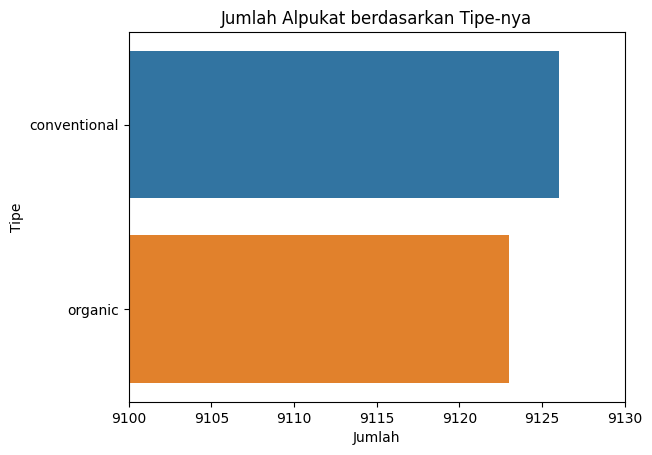

In [ ]:
sns.countplot(y='type', data=df)

plt.title("Jumlah Alpukat berdasarkan Tipe-nya")
plt.ylabel("Tipe")
plt.xlabel("Jumlah")
plt.xlim(9100, 9130)

plt.show()

In [ ]:
# Menghitung jumlah conventional dalam type
filtered = df[df['type'] == 'conventional']
count_conventional = filtered.shape[0]
print(count_conventional)


9126


In [ ]:
# Menghitung jumlah organic dalam type
filtered = df[df['type'] == 'organic']
count_organic = filtered.shape[0]
print(count_organic)

9123


<ipython-input-25-756d61de71ef>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='AveragePrice'>

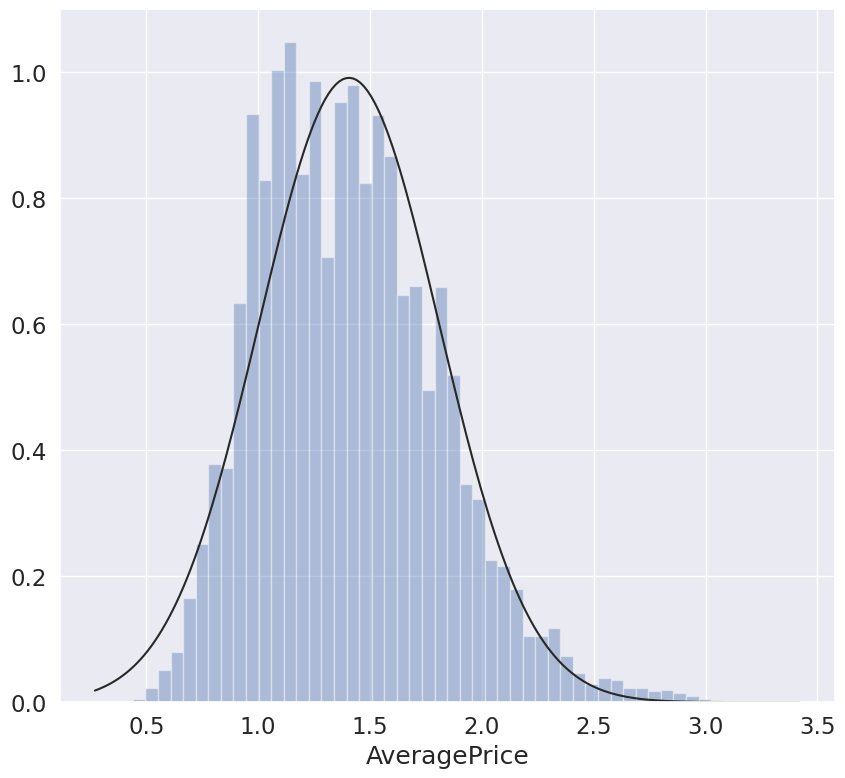

In [ ]:
sns.set(font_scale=1.5)
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(10, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)

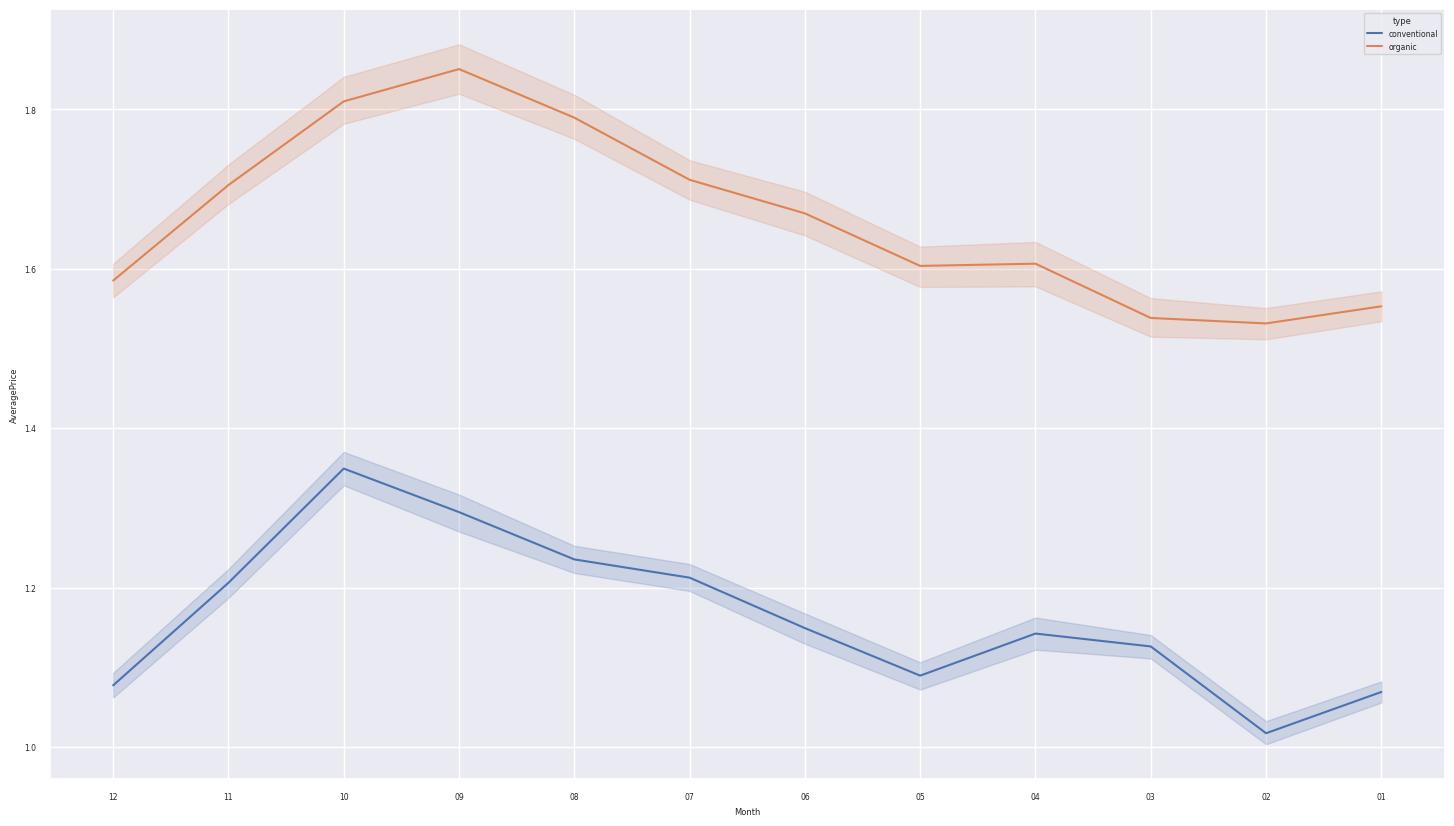

In [ ]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

In [105]:
#Konversi tipe data 'Date' jadi datetime
df['Date'] = pd.to_datetime(df['Date'])

In [122]:
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
Year                     int64
Month                    int64
Day                      int64
dtype: object

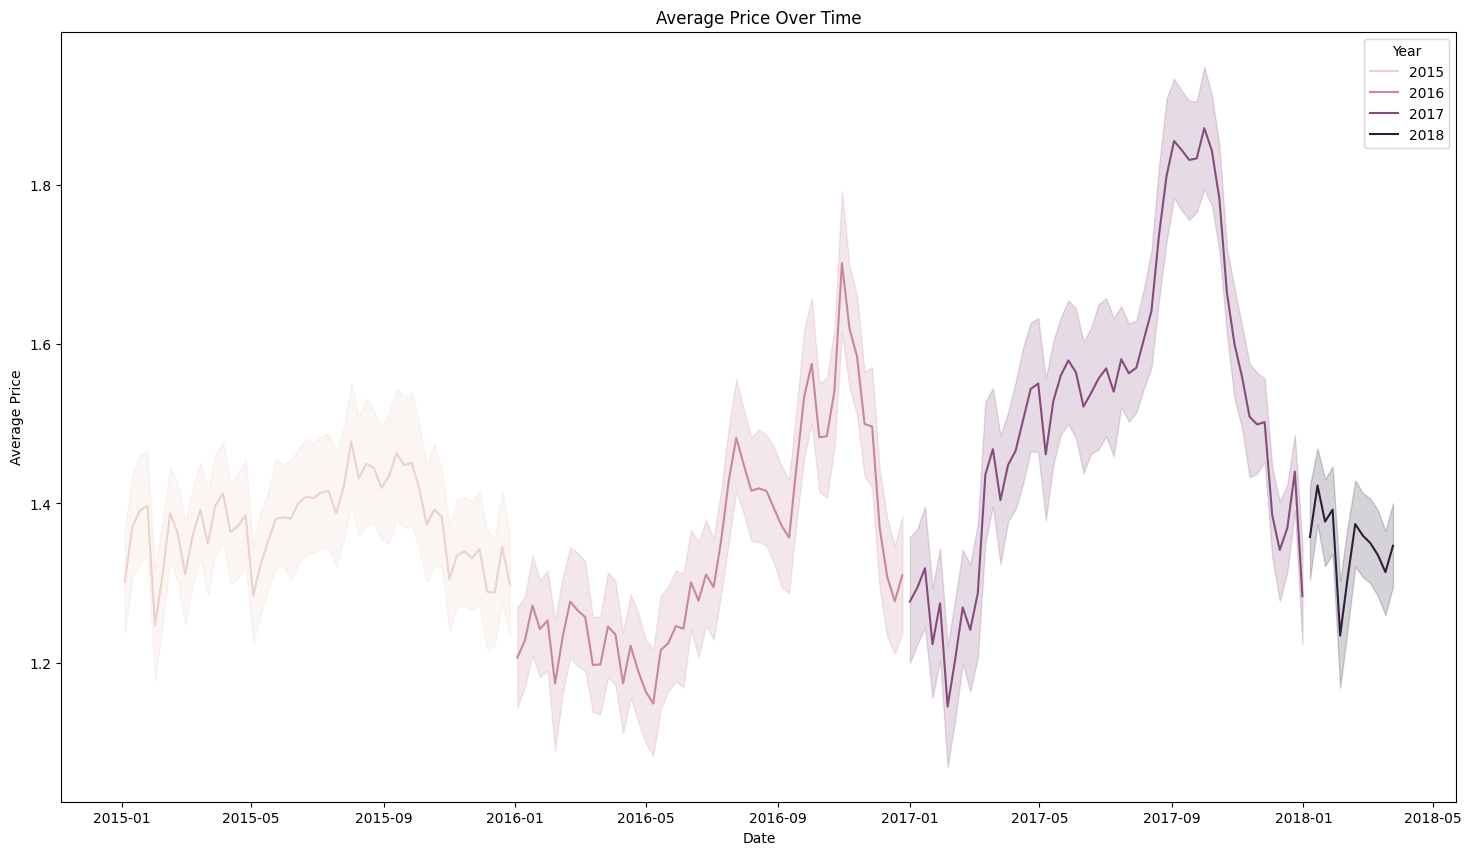

In [107]:
plt.figure(figsize=(18, 10))

sns.lineplot(x="Date", y="AveragePrice", hue='year', data=df)

plt.title('Average Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend(title='Year')

plt.show()

In [116]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

print(df)

       Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0               0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1 2015-12-20          1.35      54876.98   674.28   44638.81   
2               2 2015-12-13          0.93     118220.22   794.70  109149.67   
3               3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4 2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...        ...           ...           ...      ...        ...   
18244           7 2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8 2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9 2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10 2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11 2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  

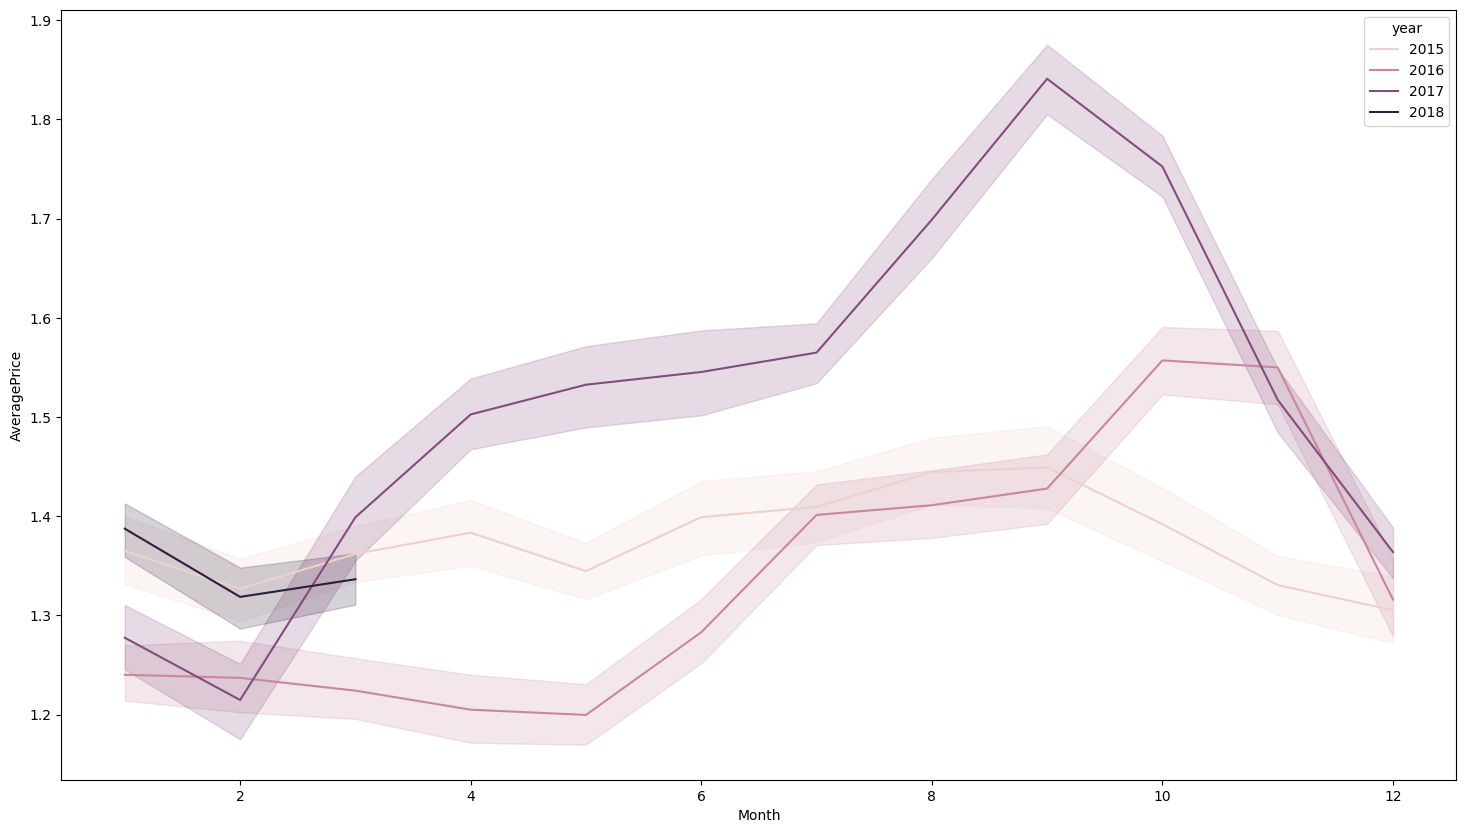

In [117]:
plt.figure(figsize=(18,10))
sns.lineplot(x="Month", y="AveragePrice", hue='year',  data=df)
plt.show()

In [130]:
#df.drop('year', axis=1, inplace=True)
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
region                  object
Year                     int64
Month                    int64
Day                      int64
dtype: object

<Axes: xlabel='Month'>

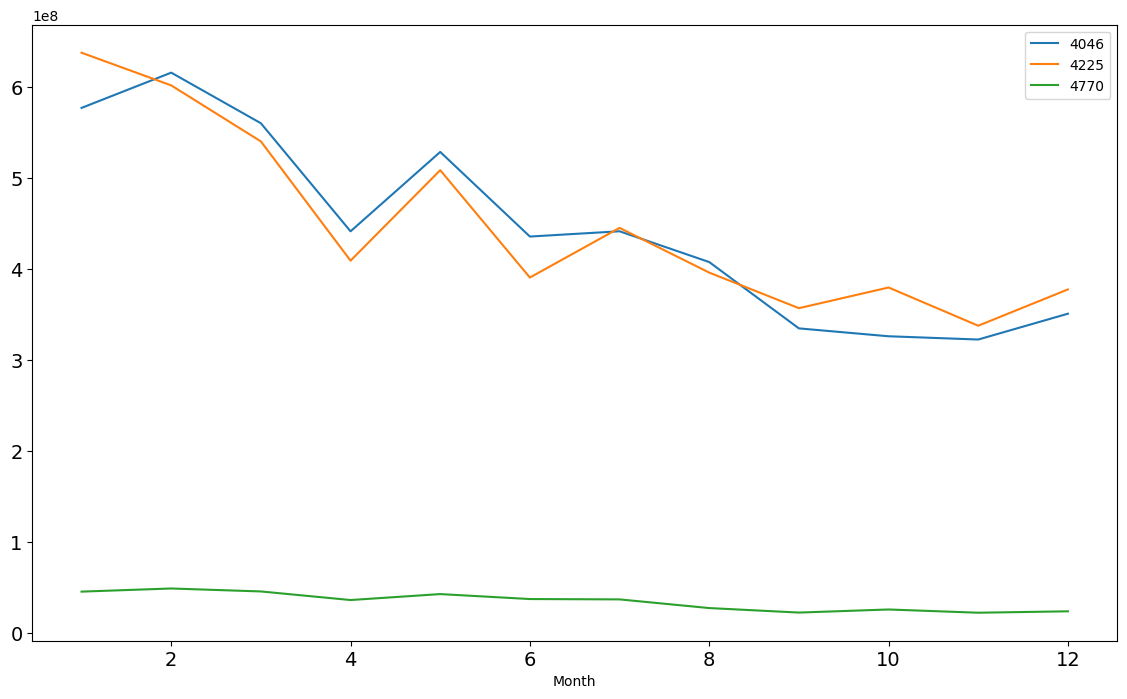

In [132]:
variant = df[['4046', '4225', '4770']].groupby(df.Month).sum()
variant.plot(kind='line', fontsize = 14, figsize=(14,8))